# **12-Months Sales Data Analysis**

### *Answering business questions through data*

In [132]:
import pandas as pd
import os
import glob


## **Merging Monthly sales data into a single  CSV file**

In [ ]:
# Changing current directory
os.chdir("D:\Courses\Projects\Solving real world data science tasks w pandas\Pandas-Data-Science-Tasks\SalesAnalysis")

# List of all csv names (All files inside Sales_Data folder)
filenames_list = [name for name in glob.glob('./Sales_Data/*')]

# Combining all csvs in the list into a df
combined_df = pd.concat(pd.read_csv(monthly_csv) for monthly_csv in filenames_list) 

# Converting df to a csv
combined_df.to_csv("./Sales_Data/CombinedSalesData_2019.csv", index = False, encoding = 'utf-8-sig')   # index = false does not add indices as a seperate col


## **Data Cleaning**

### **Dropping rows with NaN**

In [45]:
# Checkong total NaN values
combined_df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
Month               1090
dtype: int64

In [95]:
# Deeleting rows where all values of the rows are NaN
combined_df = combined_df.dropna(how = 'all')

# Checking if any NaN value left
combined_df[combined_df.isna().any(axis=1)]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [61]:
# Checking
combined_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

### **Figuring out row with 'Or' in Order date and deleting it**

In [96]:
# Finding rows w 'Or'
temp_df  = combined_df[combined_df['Order Date'].str[0:2] == 'Or']
temp_df.head()

# Keeping all rows where Order date does not start w 'Or'
combined_df = combined_df[combined_df['Order Date'].str[0:2] != 'Or']
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### **Converting Columns to correct data type**

In [197]:
combined_df['Quantity Ordered'] = combined_df['Quantity Ordered'].astype('int32')
combined_df['Price Each'] = combined_df['Price Each'].astype('float')
combined_df['Purchase Address'] = combined_df['Purchase Address'].astype('string')
combined_df['Order Date'] = combined_df['Order Date'].astype('string')

### **Deleting Duplicate rows**

In [ ]:
combined_df.drop_duplicates(inplace = True)

## **Q1. Which was the best month for sales? How much was earned that month?**

### **Adding a month column**

In [97]:
combined_df['Month'] = combined_df['Order Date'].str[0:2]

# Converting data type from str to int
combined_df['Month'] = combined_df['Month'].astype('int32')
combined_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### **Adding a total sale column**

In [127]:
combined_df['Total Sales'] = combined_df['Quantity Ordered'] * combined_df['Price Each']

### **Grouping by month column**

#### *Total Monthly Sale*

In [137]:
monthly_sales_data = combined_df.groupby('Month').sum()['Total Sales']
monthly_sales_data.head()

Month
1    5.466770e+06
2    6.606067e+06
3    8.421301e+06
4    1.017201e+07
5    9.457820e+06
Name: Total Sales, dtype: float64

#### *Maximum Total Monthly Sale*

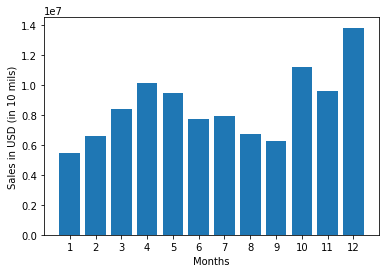

In [145]:
import matplotlib.pyplot as plt

plt.bar(monthly_sales_data.index, monthly_sales_data)
plt.xticks(months)
plt.ylabel('Sales in USD (in 10 mils)')
plt.xlabel('Months')
plt.show()

In [140]:
monthly_sales_data[monthly_sales_data == monthly_sales_data.max()]

# Maximum sale in December  = 1.38 * 10^7

Month
12    1.384033e+07
Name: Total Sales, dtype: float64

## **Q2. What city has the highest number of sales?**

### **Adding a city column**

In [186]:
def get_city(address):
    return address.split(',')[1]

# City with same name can exist in multiple states
def get_state(address):
    return address.split(',')[2].split(' ')[1]


combined_df['Purchase city'] = combined_df['Purchase Address'].apply(lambda x: get_city(x) + ', ' +get_state(x))
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Purchase city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [188]:
city_wise_data = combined_df.groupby('Purchase city').sum()
city_wise_data.head()

,Quantity Ordered,Price Each,Month,Total Sales
Purchase city,,,,
"Atlanta, GA",49806,8.339725e+06,314382,8.386496e+06
"Austin, TX",33459,5.429621e+06,209487,5.458745e+06
"Boston, MA",67584,1.091223e+07,423336,1.098493e+07
"Dallas, TX",50190,8.257883e+06,313860,8.303926e+06
"Los Angeles, CA",99867,1.626431e+07,624975,1.635771e+07


### **Plotting city-wise data**

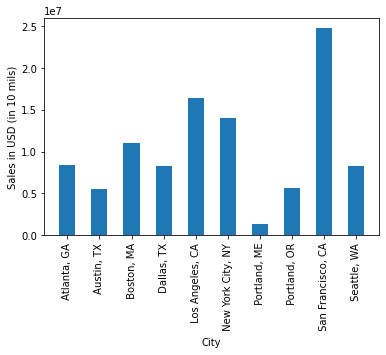

In [193]:
plt.bar(city_wise_data.index ,city_wise_data['Total Sales'], width = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('Sales in USD (in 10 mils)')
plt.xlabel('City names')
plt.show()

## **Q3. What time should we display advertisements to maximize the likelihood of customer’s buying product?**

### **Adding a 'Purchasing Hour' column**

In [233]:
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])

combined_df['Purchasing Hour'] = combined_df['Order Date'].dt.hour
combined_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Purchase city,Purchasing Hour,Purchasing Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [232]:
hourly_result = combined_df.groupby('Purchasing Hour').sum()
hourly_result.head()

,Quantity Ordered,Price Each,Month,Total Sales,Purchasing Minute
Purchasing Hour,,,,,
0,13284,2127890.10,82662,2141163.81,310788
1,7857,1375470.00,49971,1382600.64,185421
2,4194,701500.92,25521,704554.32,97524
3,2784,434179.26,17712,437273.67,69132
4,2811,486174.54,18444,487983.03,80628


### **Hour vs Total Sales graph**

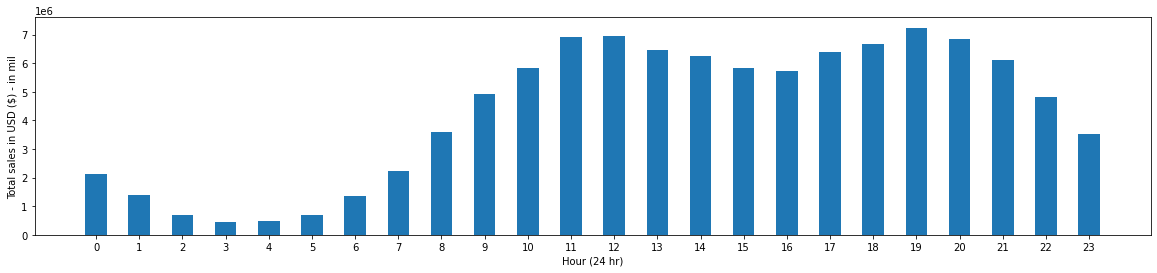

In [231]:
plt.figure(figsize=(20, 4))
plt.bar(hourly_result.index, hourly_result['Total Sales'], width = 0.5)

plt.xticks(hourly_result.index)

plt.ylabel('Total sales in USD ($) - in mil')
plt.xlabel('Hour (24 hr)')
plt.show()

# Maximum sales around 11am and 7pm

## **Q4. What products are most often sold together?**

### **Making df with Order IDs which occur more than once**

In [320]:
df = combined_df[combined_df['Order ID'].duplicated(keep = False)]  # Keeps all rows with duplicates
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Purchase city,Purchasing Hour,Purchasing Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,42
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,0


### **Merging rows with same Order ID**

In [323]:
# Grouping by order Id and combining all products into a single column
df['Products grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Dropping rows with same Order ID
df.drop_duplicates(subset = ['Order ID'], keep = 'first', inplace = True)
df.head()

<ipython-input-323-3cd87e84ba99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Products grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
<ipython-input-323-3cd87e84ba99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset = ['Order ID'], keep = 'first', inplace = True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Purchase city,Purchasing Hour,Purchasing Minute,Products grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,42,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,"San Francisco, CA",17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,"New York City, NY",11,7,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,"Seattle, WA",10,39,"Apple Airpods Headphones,ThinkPad Laptop"


### **Finding frequency of each pair**

In [324]:
from itertools import combinations
from collections import Counter

# List of containg list of each product in the group
productgroups_list = df['Products grouped'].tolist()  # series to list
productgroups_list = [group.split(',') for group in productgroups_list]

count = Counter()

# Getting count of all combinations
for group in productgroups_list:
    count.update(Counter(combinations(group, 2))) # counter obj updated in every iteration. freq of every combination incremented


### **Making a dataframe of Combinations and Frequency**

In [337]:
combos_dict = dict(count)
combos_lst = []
freq_lst = []

for key in combos_dict:
    combos_lst.append(f"{key[0]} + {key[1]}")
    freq_lst.append(combos_dict[key])

# Displaying top 10 highest purchased combinations
combos_df = pd.DataFrame({'Combination': combos_lst, 'Frequency': freq_lst})
combos_df.sort_values('Frequency', ascending = False).head(10)

,Combination,Frequency
7,iPhone + Lightning Charging Cable,1002
1,Google Phone + USB-C Charging Cable,985
12,iPhone + Wired Headphones,447
0,Google Phone + Wired Headphones,413
21,Vareebadd Phone + USB-C Charging Cable,361
15,iPhone + Apple Airpods Headphones,360
8,Google Phone + Bose SoundSport Headphones,220
35,USB-C Charging Cable + Wired Headphones,159
42,Vareebadd Phone + Wired Headphones,143
76,Lightning Charging Cable + Wired Headphones,92


## **Q5. What product sold the most? Why do you think it sold the most?**

In [350]:
result = combined_df.groupby('Product')['Quantity Ordered'].sum()
result.sort_values(ascending = False)

Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

### **Checking for a correlation between the price and the quantity purchased**

In [405]:
prices_grp = combined_df.groupby('Product').mean()['Price Each']
print(prices_grp)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-409-39d9edfbbc32>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = result.index,rotation = 'vertical')


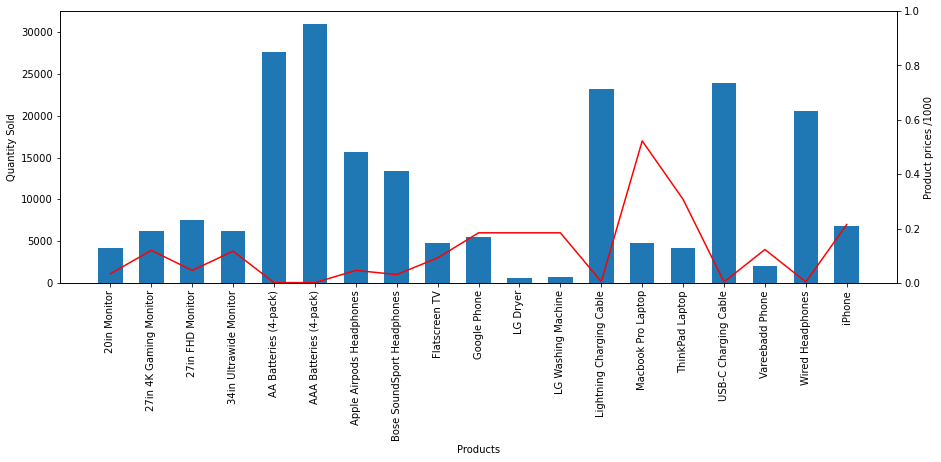

In [409]:
fig,ax = plt.subplots(figsize=(15,5))

ax2 = ax.twinx()

ax.bar(result.index, result, width = 0.6)
ax.set_ylabel('Quantity Sold')
ax.set_xlabel('Products')
ax.set_xticklabels(labels = result.index,rotation = 'vertical')


ax.plot(result.index, prices_grp* 10, color = 'red')
ax2.set_ylabel('Product prices /1000')
plt.show()

# A correlation between price and Quantity solf- quantity sold is high for cheaper products (True for the max order quantity products)
# Some discrepancies for eg. LG Dryer and Macbook Pro Laptop, even though laptop is expensive quanity sold is higher